<a href="https://colab.research.google.com/github/umar-faroooq/Jupyter-notebooks/blob/main/One_AHU_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning

***Feature Engineering*** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# !rm -rf /content/drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgHW6q8N5xV27EmUfeg5q0Ei85ISZbRxOXTT-icocVgg4-p8Y_55uk


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
HVAC = pd.read_csv('/content/drive/MyDrive/Basma Label/cleaned_data_time.csv')
Wheater = pd.read_csv('/content/drive/MyDrive/Basma Label/wheatherr_time.csv')

In [ ]:
HVAC1 = HVAC
HVAC1.dtypes

timestamp              object
r_humidity_ahu_s5b      int64
r_humidity_ahu_s2       int64
r_humidity_ahu_s1       int64
r_humidity_ahu_g5       int64
                       ...   
sa_temp_ahu_g1        float64
sa_temp_ahu_f5          int64
sa_temp_ahu_f3          int64
sa_temp_ahu_f1          int64
sa_temp_ahu2            int64
Length: 66, dtype: object

In [ ]:
Wheater1 = Wheater
Wheater1.dtypes

timestamp        object
RECORD            int64
GHI_corr_Avg    float64
DNI_corr_Avg    float64
DHI_corr_Avg    float64
Tair_Avg        float64
RH_Avg          float64
BP_CS100_Avg    float64
WS_WVc(1)       float64
WS_WVc(2)       float64
WS_WVc(3)       float64
WSgust_Max      float64
dtype: object

In [ ]:

HVAC1['timestamp'] = pd.to_datetime(HVAC1['timestamp'])
Wheater1['timestamp'] = pd.to_datetime(Wheater1['timestamp'])
# HVAC.head(100)
# HVAC.dtypes

In [ ]:
HVAC1['timestamp'] = HVAC1['timestamp'].dt.strftime('%d-%m-%Y %H:%M')
Wheater1['timestamp'] = Wheater1['timestamp'].dt.strftime('%d-%m-%Y %H:%M')
# HVAC.dtypes

In [ ]:
HVAC1.head(5)

,timestamp,r_humidity_ahu_s5b,r_humidity_ahu_s2,r_humidity_ahu_s1,r_humidity_ahu_g5,r_humidity_ahu_g4,r_humidity_ahu_g3,r_humidity_ahu_g2,r_humidity_ahu_g1,r_humidity_ahu_f5,r_humidity_ahu_f3,r_humidity_ahu_f1,ai_r_humidity_ahu_f2_new,ai_ra_temp_ahu_f2_new,ai_rchw_temp_ahu_f2_new,ai_sa_temp_ahu_f2_new,ra_temp_ahu_g5,ra_temp_ahu_g4,ra_temp_ahu_g3,ra_temp_ahu_g2,ra_temp_ahu_g1,ra_temp_ahu_f5,ra_temp_ahu_f3,ra_temp_ahu_f1,ra_temp_gullahmed_ahu5,ra_temp_gullahmed_ahu4,ra_temp_gullahmed_ahu3,ra_temp_gullahmed_ahu1,ra_temp_ahu_s5b,ra_temp_ahu_s2,ra_temp_ahu_s1,ra_temp_ahu2,ra_temp_mc_ahu10g,ra_temp_mc_ahu10f,ra_temp_mc_ahu10c,ra_temp_mc_ahu10b,ra_temp_junaidj_ahu2,ra_temp_junaidj_ahu1,ra_temp_gullamed_ahu7,ra_temp_gullamed_ahu6,ra_temp_gullamed_ahu5,ra_temp_gullahmed_ahu7,ra_temp_gullahmed_ahu6,rchw_temp_ahu_s5b,rchw_temp_ahu_s2,rchw_temp_ahu_s1,rchw_temp_ahu_g5,rchw_temp_ahu_g4,rchw_temp_ahu_g3,rchw_temp_ahu_g2,rchw_temp_ahu_g1,rchw_temp_ahu_f5,rchw_temp_ahu_f3,rchw_temp_ahu_f1,sa_temp_ahu_s5b,sa_temp_ahu_s2,sa_temp_ahu_s1,sa_temp_ahu_g5,sa_temp_ahu_g4,sa_temp_ahu_g3,sa_temp_ahu_g2,sa_temp_ahu_g1,sa_temp_ahu_f5,sa_temp_ahu_f3,sa_temp_ahu_f1,sa_temp_ahu2
0,07-01-2021 01:10,28,35,40,5555,44,42,42,42.0,39,38,5555,36,35,22,26,5555,29,30,41,29.0,31,30,5555,5555,5555,5555.0,5555,34,58,29,5555.0,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,24,25,22,5555,18,17,19,21.0,25,23,5555,33,30,28,5555,27,25,26,26.0,27,28,5555,5555
1,07-01-2021 01:20,28,35,40,5555,44,42,43,42.0,39,38,5555,36,35,22,26,5555,29,30,41,29.0,31,30,5555,5555,5555,5555.0,5555,35,58,30,5555.0,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,24,25,22,5555,18,17,19,21.0,26,23,5555,34,30,28,5555,27,25,26,26.0,27,28,5555,5555
2,07-01-2021 01:30,28,35,40,5555,44,42,43,42.0,39,38,5555,35,35,22,27,5555,29,30,40,29.0,31,30,5555,5555,5555,5555.0,5555,35,59,30,5555.0,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,25,25,23,5555,18,17,19,21.0,26,23,5555,34,30,28,5555,27,25,26,26.0,27,28,5555,5555
3,07-01-2021 01:40,28,35,40,5555,44,41,44,42.0,39,38,5555,35,35,22,27,5555,29,30,40,29.0,31,30,5555,5555,5555,5555.0,5555,35,59,30,5555.0,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,25,25,23,5555,18,17,19,22.0,26,23,5555,34,31,28,5555,27,26,27,26.0,28,28,5555,5555
4,07-01-2021 01:50,27,35,40,5555,43,42,45,42.0,39,37,5555,34,35,22,28,5555,29,30,40,29.0,31,30,5555,5555,5555,5555.0,5555,35,59,30,5555.0,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,5555,25,26,23,5555,18,18,19,22.0,26,23,5555,34,31,28,5555,28,26,27,27.0,28,28,5555,5555


In [ ]:
Wheater1.head(100)
# Wheater.dtypes

,timestamp,RECORD,GHI_corr_Avg,DNI_corr_Avg,DHI_corr_Avg,Tair_Avg,RH_Avg,BP_CS100_Avg,WS_WVc(1),WS_WVc(2),WS_WVc(3),WSgust_Max
0,01-07-2021 00:00,283604,-2.940109,-0.397235,-4.689715,33.19,37.87,934.5744,1.173,56.75,5.549,2.632
1,01-07-2021 00:10,283605,-3.102912,-0.397236,-4.965528,33.04,38.26,934.2101,0.618,61.75,0.955,2.129
2,01-07-2021 00:20,283606,-2.915175,-0.397238,-4.904566,32.67,39.53,933.7405,1.492,62.66,0.096,2.129
3,01-07-2021 00:30,283607,-2.881719,-0.397240,-4.757665,32.64,39.91,933.2647,0.979,61.59,2.144,2.381
4,01-07-2021 00:40,283608,-2.520966,-0.397241,-4.221111,32.57,40.25,932.8635,0.626,56.20,0.267,1.878
...,...,...,...,...,...,...,...,...,...,...,...,...
95,01-07-2021 15:50,283699,531.759500,413.975800,240.761500,41.57,25.98,994.0324,2.516,161.70,35.520,4.391
96,01-07-2021 16:00,283700,500.598100,398.069700,231.992800,41.39,25.74,993.2811,1.925,180.40,23.330,4.391
97,01-07-2021 16:10,283701,482.727100,396.960600,226.187200,41.56,25.38,993.1857,0.819,156.70,13.340,3.135
98,01-07-2021 16:20,283702,466.265000,402.679500,217.627800,41.86,24.46,994.0145,1.707,165.70,22.580,3.135


In [ ]:
# HVAC.head(5)

In [ ]:
# Wheater.head(5)

In [ ]:
data = pd.merge(HVAC1,Wheater1,on='timestamp')

In [ ]:

data.shape

(475, 77)

In [ ]:
# Wheater = Wheater.rename(columns={"timestamp":"TIMESTAMP"})
# Wheater['TIMESTAMP'] = pd.to_datetime(Wheater['TIMESTAMP'])
# Wheater.head(5)

In [ ]:
# merged_inner = pd.merge(left=HVAC, right=Wheater, left_on='timestamp')

# merged_inner.shape
# merged_inner
# merged_00 = HVAC.join(other=Wheater,on='timestamp',how='inner')
New = pd.merge(HVAC, Wheater, on='timestamp', how='inner')
# New = HVAC.merge(Wheater, left_on='timestamp')
# New = pd.merge(HVAC,Wheater,on='timestamp')


In [ ]:
data.to_csv("/content/drive/MyDrive/Basma Label/Merged_output.csv", index=False)

NameError: ignored

In [ ]:
data.head(5)

,timestamp,r_humidity_ahu_s5b,r_humidity_ahu_s2,r_humidity_ahu_s1,r_humidity_ahu_g5,r_humidity_ahu_g4,r_humidity_ahu_g3,r_humidity_ahu_g2,r_humidity_ahu_g1,r_humidity_ahu_f5,r_humidity_ahu_f3,r_humidity_ahu_f1,ai_r_humidity_ahu_f2_new,ai_ra_temp_ahu_f2_new,ai_rchw_temp_ahu_f2_new,ai_sa_temp_ahu_f2_new,ra_temp_ahu_g5,ra_temp_ahu_g4,ra_temp_ahu_g3,ra_temp_ahu_g2,ra_temp_ahu_g1,ra_temp_ahu_f5,ra_temp_ahu_f3,ra_temp_ahu_f1,ra_temp_gullahmed_ahu5,ra_temp_gullahmed_ahu4,ra_temp_gullahmed_ahu3,ra_temp_gullahmed_ahu1,ra_temp_ahu_s5b,ra_temp_ahu_s2,ra_temp_ahu_s1,ra_temp_ahu2,ra_temp_mc_ahu10g,ra_temp_mc_ahu10f,ra_temp_mc_ahu10c,ra_temp_mc_ahu10b,ra_temp_junaidj_ahu2,ra_temp_junaidj_ahu1,ra_temp_gullamed_ahu7,ra_temp_gullamed_ahu6,ra_temp_gullamed_ahu5,ra_temp_gullahmed_ahu7,ra_temp_gullahmed_ahu6,rchw_temp_ahu_s5b,rchw_temp_ahu_s2,rchw_temp_ahu_s1,rchw_temp_ahu_g5,rchw_temp_ahu_g4,rchw_temp_ahu_g3,rchw_temp_ahu_g2,rchw_temp_ahu_g1,rchw_temp_ahu_f5,rchw_temp_ahu_f3,rchw_temp_ahu_f1,sa_temp_ahu_s5b,sa_temp_ahu_s2,sa_temp_ahu_s1,sa_temp_ahu_g5,sa_temp_ahu_g4,sa_temp_ahu_g3,sa_temp_ahu_g2,sa_temp_ahu_g1,sa_temp_ahu_f5,sa_temp_ahu_f3,sa_temp_ahu_f1,sa_temp_ahu2,RECORD,GHI_corr_Avg,DNI_corr_Avg,DHI_corr_Avg,Tair_Avg,RH_Avg,BP_CS100_Avg,WS_WVc(1),WS_WVc(2),WS_WVc(3),WSgust_Max
0,01/07/2021 10:00,27,40,48,5555,60,57,51,54.0,42,42,5555,36,37,14,30,5555,25,25,39,27.0,33,32,5555,5555,5555,5555.0,5555,29,57,30,0.001,27,24,25,25,5555,5555,5555,5555,5555,5555,5555,23,17,20,5555,19,18,11,11.0,29,22,5555,22,18,19,5555,20,19,28,27.0,30,28,5555,29,283664,734.3021,515.9564,262.5470,37.05,34.79,972.8850,1.847,90.4,33.22,4.140
1,01/07/2021 10:10,27,40,45,5555,61,57,51,54.0,41,42,5555,35,37,14,30,5555,25,25,39,27.0,33,32,5555,5555,5555,5555.0,5555,29,57,30,0.001,27,24,25,25,5555,5555,5555,5555,5555,5555,5555,23,17,20,5555,19,18,11,11.0,29,22,5555,22,18,19,5555,20,19,28,27.0,30,28,5555,29,283665,759.8536,529.2421,266.5243,37.14,35.86,973.7304,2.788,124.1,14.16,4.643
2,01/07/2021 10:20,27,40,45,5555,60,57,51,54.0,41,41,5555,33,37,14,30,5555,25,25,40,27.0,33,32,5555,5555,5555,5555.0,5555,29,57,31,0.001,27,24,25,25,5555,5555,5555,5555,5555,5555,5555,23,17,20,5555,19,18,11,10.0,29,22,5555,22,18,19,5555,20,19,28,27.0,30,28,5555,29,283666,771.3381,526.9483,270.5042,37.08,35.81,974.2053,2.121,121.5,18.85,3.889
3,01/07/2021 10:30,26,40,46,5555,60,57,51,54.0,40,41,5555,33,37,14,31,5555,25,25,40,27.0,33,32,5555,5555,5555,5555.0,5555,29,57,30,0.001,27,24,25,25,5555,5555,5555,5555,5555,5555,5555,23,17,19,5555,19,18,11,11.0,29,22,5555,22,18,18,5555,20,19,28,27.0,30,28,5555,29,283667,791.1235,537.2344,271.0526,37.61,35.27,975.1596,1.511,96.8,42.44,3.637
4,01/07/2021 10:40,25,39,44,5555,59,56,51,54.0,37,39,5555,29,36,14,31,5555,25,25,40,27.0,33,32,5555,5555,5555,5555.0,5555,29,57,31,0.001,27,24,25,25,5555,5555,5555,5555,5555,5555,5555,23,17,20,5555,19,18,12,11.0,29,22,5555,22,17,18,5555,20,19,28,27.0,30,28,5555,29,283668,808.0266,546.0510,271.9963,37.80,35.15,976.2115,2.004,112.5,55.04,3.889


# Data-Preparation

In [226]:
import numpy as np
import pandas as pd

In [227]:
data = pd.read_csv("/content/drive/MyDrive/Data/Merged_output.csv")

In [228]:
data.index

RangeIndex(start=0, stop=475, step=1)

In [229]:
New_data = data.filter(["timestamp", "r_humidity_ahu_s5b", "sa_temp_ahu_s5b", "ra_temp_ahu_s5b", "rchw_temp_ahu_s5b", "DNI_corr_Avg", "Tair_Avg"])

In [230]:
New_data

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg
0,01/07/2021 10:00,27,22,29,23,515.9564,37.05
1,01/07/2021 10:10,27,22,29,23,529.2421,37.14
2,01/07/2021 10:20,27,22,29,23,526.9483,37.08
3,01/07/2021 10:30,26,22,29,23,537.2344,37.61
4,01/07/2021 10:40,25,22,29,23,546.0510,37.80
...,...,...,...,...,...,...,...
470,15/07/2021 15:20,46,24,28,26,521.2859,34.74
471,15/07/2021 15:30,46,24,28,26,544.3654,34.71
472,15/07/2021 15:40,47,24,28,26,550.3915,35.16
473,15/07/2021 15:50,47,24,28,26,537.3979,35.01


In [231]:
New_data['timestamp']= pd.to_datetime(New_data['timestamp'])
New_data['hour'] = New_data['timestamp'].dt.hour

In [232]:
New_data.head(5)
New_data.hour.unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [233]:
New_data['sin_time'] = np.sin(2*np.pi*New_data.hour/24)
New_data['cos_time'] = np.cos(2*np.pi*New_data.hour/24)

In [234]:
New_data.head(10)

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg,hour,sin_time,cos_time
0,2021-01-07 10:00:00,27,22,29,23,515.9564,37.05,10,0.500000,-0.866025
1,2021-01-07 10:10:00,27,22,29,23,529.2421,37.14,10,0.500000,-0.866025
2,2021-01-07 10:20:00,27,22,29,23,526.9483,37.08,10,0.500000,-0.866025
3,2021-01-07 10:30:00,26,22,29,23,537.2344,37.61,10,0.500000,-0.866025
4,2021-01-07 10:40:00,25,22,29,23,546.0510,37.80,10,0.500000,-0.866025
5,2021-01-07 10:50:00,23,22,29,23,552.6674,37.75,10,0.500000,-0.866025
6,2021-01-07 11:00:00,23,23,29,23,559.3315,37.64,11,0.258819,-0.965926
7,2021-01-07 11:10:00,22,23,29,24,552.3637,38.20,11,0.258819,-0.965926
8,2021-01-07 11:20:00,22,23,29,23,559.0391,38.36,11,0.258819,-0.965926
9,2021-01-07 11:30:00,22,23,29,23,577.4869,38.37,11,0.258819,-0.965926


In [235]:
# New_data.to_csv('/content/drive/MyDrive/Data/Data_Hamza.csv', index=False)

In [236]:
print(New_data['DNI_corr_Avg'].min())
print(New_data['DNI_corr_Avg'].max())

-1.403922
743.576


In [237]:
# New_data['DNI_corr_Avg'] = New_data['DNI_corr_Avg']/100

New_data.loc[New_data['DNI_corr_Avg'] < 0, "DNI_corr_Avg"] = 0
New_data['DNI_corr_Avg'] = New_data['DNI_corr_Avg'].astype('int64')

In [238]:
print(New_data['DNI_corr_Avg'].min())
print(New_data['DNI_corr_Avg'].max())

0
743


In [239]:

New_data['DNI_corr_Avg'] = New_data['DNI_corr_Avg']/100
New_data['DNI_corr_Avg'] = New_data['DNI_corr_Avg'].astype('int64')
New_data.head(5)

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg,hour,sin_time,cos_time
0,2021-01-07 10:00:00,27,22,29,23,5,37.05,10,0.5,-0.866025
1,2021-01-07 10:10:00,27,22,29,23,5,37.14,10,0.5,-0.866025
2,2021-01-07 10:20:00,27,22,29,23,5,37.08,10,0.5,-0.866025
3,2021-01-07 10:30:00,26,22,29,23,5,37.61,10,0.5,-0.866025
4,2021-01-07 10:40:00,25,22,29,23,5,37.80,10,0.5,-0.866025


In [240]:
# New_data['DNI_corr_Avg'] = New_data['DNI_corr_Avg'].astype('int64')

In [241]:
print(New_data['DNI_corr_Avg'].min())
print(New_data['DNI_corr_Avg'].max())

0
7


In [242]:
New_data

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg,hour,sin_time,cos_time
0,2021-01-07 10:00:00,27,22,29,23,5,37.05,10,0.500000,-0.866025
1,2021-01-07 10:10:00,27,22,29,23,5,37.14,10,0.500000,-0.866025
2,2021-01-07 10:20:00,27,22,29,23,5,37.08,10,0.500000,-0.866025
3,2021-01-07 10:30:00,26,22,29,23,5,37.61,10,0.500000,-0.866025
4,2021-01-07 10:40:00,25,22,29,23,5,37.80,10,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...
470,2021-07-15 15:20:00,46,24,28,26,5,34.74,15,-0.707107,-0.707107
471,2021-07-15 15:30:00,46,24,28,26,5,34.71,15,-0.707107,-0.707107
472,2021-07-15 15:40:00,47,24,28,26,5,35.16,15,-0.707107,-0.707107
473,2021-07-15 15:50:00,47,24,28,26,5,35.01,15,-0.707107,-0.707107


In [243]:
# New_data.head(5)

In [244]:
# New_data['MRT'] = 6.382 +0.914*New_data.ra_temp_ahu_s5b + 0.086*New_data.Tair_Avg - 1.060*New_data.DNI_corr_Avg -0.712*New_data.sin_time - 0.459*New_data.cos_time
# New_data['cos_time'] = np.cos(2*np.pi*New_data.hour/24)

In [245]:
New_data['Optimal_t_p'] = 20.699 - (0.045*New_data.Tair_Avg) + (0.544*New_data.DNI_corr_Avg) + (0.332*New_data.sin_time) - (0.040*New_data.cos_time)

In [246]:
# New_data['Optimal_Temp_MRT'] = (0.5*New_data.MRT + 0.5*New_data.ra_temp_ahu_s5b)

In [247]:
New_data.head(5)

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg,hour,sin_time,cos_time,Optimal_t_p
0,2021-01-07 10:00:00,27,22,29,23,5,37.05,10,0.5,-0.866025,21.952391
1,2021-01-07 10:10:00,27,22,29,23,5,37.14,10,0.5,-0.866025,21.948341
2,2021-01-07 10:20:00,27,22,29,23,5,37.08,10,0.5,-0.866025,21.951041
3,2021-01-07 10:30:00,26,22,29,23,5,37.61,10,0.5,-0.866025,21.927191
4,2021-01-07 10:40:00,25,22,29,23,5,37.80,10,0.5,-0.866025,21.918641


In [248]:
New_data['DNI_replaced'] = New_data['DNI_corr_Avg'].replace([9,8,7,6,5,4,3,2,1,0], [1,1,1,1,2,3,4,5,6,7])

In [249]:
New_data['Optimal_t_p_replaced'] = 20.699 - (0.045*New_data.Tair_Avg) + (0.544*New_data.DNI_replaced) + (0.332*New_data.sin_time) - (0.040*New_data.cos_time)

In [250]:
New_data.head(5)

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg,hour,sin_time,cos_time,Optimal_t_p,DNI_replaced,Optimal_t_p_replaced
0,2021-01-07 10:00:00,27,22,29,23,5,37.05,10,0.5,-0.866025,21.952391,2,20.320391
1,2021-01-07 10:10:00,27,22,29,23,5,37.14,10,0.5,-0.866025,21.948341,2,20.316341
2,2021-01-07 10:20:00,27,22,29,23,5,37.08,10,0.5,-0.866025,21.951041,2,20.319041
3,2021-01-07 10:30:00,26,22,29,23,5,37.61,10,0.5,-0.866025,21.927191,2,20.295191
4,2021-01-07 10:40:00,25,22,29,23,5,37.80,10,0.5,-0.866025,21.918641,2,20.286641


In [251]:
New_data['MRT_W_O'] = 6.382 +0.914*New_data.ra_temp_ahu_s5b + 0.086*New_data.Tair_Avg - 1.060*New_data.DNI_corr_Avg -0.712*New_data.sin_time - 0.459*New_data.cos_time

In [252]:
New_data['MRT_W_R'] = 6.382 +0.914*New_data.ra_temp_ahu_s5b + 0.086*New_data.Tair_Avg - 1.060*New_data.DNI_replaced -0.712*New_data.sin_time - 0.459*New_data.cos_time

In [253]:
New_data.head(50)

,timestamp,r_humidity_ahu_s5b,sa_temp_ahu_s5b,ra_temp_ahu_s5b,rchw_temp_ahu_s5b,DNI_corr_Avg,Tair_Avg,hour,sin_time,cos_time,Optimal_t_p,DNI_replaced,Optimal_t_p_replaced,MRT_W_O,MRT_W_R
0,2021-01-07 10:00:00,27,22,29,23,5,37.05,10,5.000000e-01,-8.660254e-01,21.952391,2,20.320391,30.815806,33.995806
1,2021-01-07 10:10:00,27,22,29,23,5,37.14,10,5.000000e-01,-8.660254e-01,21.948341,2,20.316341,30.823546,34.003546
2,2021-01-07 10:20:00,27,22,29,23,5,37.08,10,5.000000e-01,-8.660254e-01,21.951041,2,20.319041,30.818386,33.998386
3,2021-01-07 10:30:00,26,22,29,23,5,37.61,10,5.000000e-01,-8.660254e-01,21.927191,2,20.295191,30.863966,34.043966
4,2021-01-07 10:40:00,25,22,29,23,5,37.80,10,5.000000e-01,-8.660254e-01,21.918641,2,20.286641,30.880306,34.060306
5,2021-01-07 10:50:00,23,22,29,23,5,37.75,10,5.000000e-01,-8.660254e-01,21.920891,2,20.288891,30.876006,34.056006
6,2021-01-07 11:00:00,23,23,29,23,5,37.64,11,2.588190e-01,-9.659258e-01,21.849765,2,20.217765,31.084121,34.264121
7,2021-01-07 11:10:00,22,23,29,24,5,38.20,11,2.588190e-01,-9.659258e-01,21.824565,2,20.192565,31.132281,34.312281
8,2021-01-07 11:20:00,22,23,29,23,5,38.36,11,2.588190e-01,-9.659258e-01,21.817365,2,20.185365,31.146041,34.326041
9,2021-01-07 11:30:00,22,23,29,23,5,38.37,11,2.588190e-01,-9.659258e-01,21.816915,2,20.184915,31.146901,34.326901


In [254]:
New_data['T_OP_SP'] = (25 - 0.1*New_data.MRT_W_R)/0.9

In [255]:
New_data['T_OP_SP_0.2'] = (25 - 0.2*New_data.MRT_W_R)/0.8

In [257]:
New_data['MRT_W_R'] = New_data['MRT_W_R'].astype('int64')

In [258]:
New_data['MRT_W_O'] = New_data['MRT_W_O'].astype('int64')

In [260]:
New_data['T_supply'] = (2*25) - New_data.MRT_W_O

In [261]:
New_data['T_supply_M'] = (2*25) - New_data.MRT_W_R

In [262]:
New_data.head(50)
New_data.to_csv('/content/drive/MyDrive/Data/Temps_supply.csv', index=False)

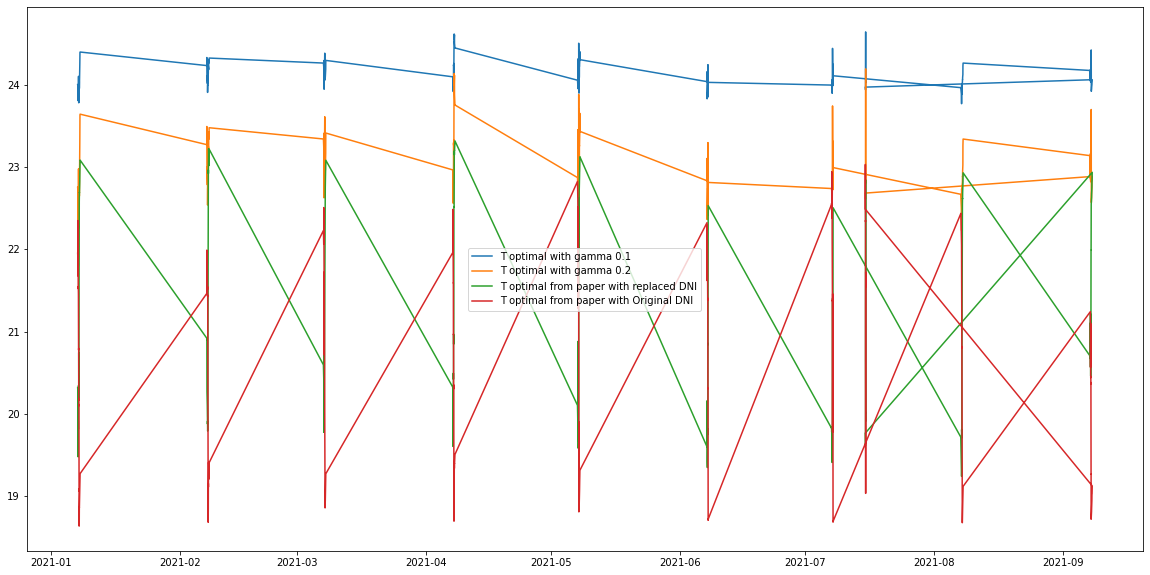

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
x= New_data.timestamp
y1 = New_data.T_OP_SP
y2 = New_data['T_OP_SP_0.2']
y3 = New_data.Optimal_t_p_replaced
y4 = New_data.Optimal_t_p
# y5 = df.r_humidity_ahu_g4%100
# y6 = df.r_humidity_ahu_g3%100
# y7 = df.r_humidity_ahu_g2%100
plt.plot(x, y1, label = 'T optimal with gamma 0.1') # plotting t, a separately 
plt.plot(x, y2, label='T optimal with gamma 0.2') # plotting t, b separately 
plt.plot(x, y3, label = 'T optimal from paper with replaced DNI') # plotting t, c separately 
plt.plot(x, y4, label= 'T optimal from paper with Original DNI') # plotting t, c separately 
# plt.plot(x, y5, label = 'r_humidity_ahu_g4') # plotting t, c separately 
# plt.plot(x, y6, label= 'r_humidity_ahu_g3') # plotting t, c separately 
# plt.plot(x, y7, label= 'r_humidity_ahu_g2') # plotting t, c separately 
# Function add a legend  
plt.legend()
  
plt.show()

In [ ]:
Dataa = New_data.filter(["timestamp", "T_OP_SP", "T_OP_SP_0.2", "Optimal_t_p_replaced", "Optimal_t_p"])
Dataa = Dataa.set_index('timestamp')


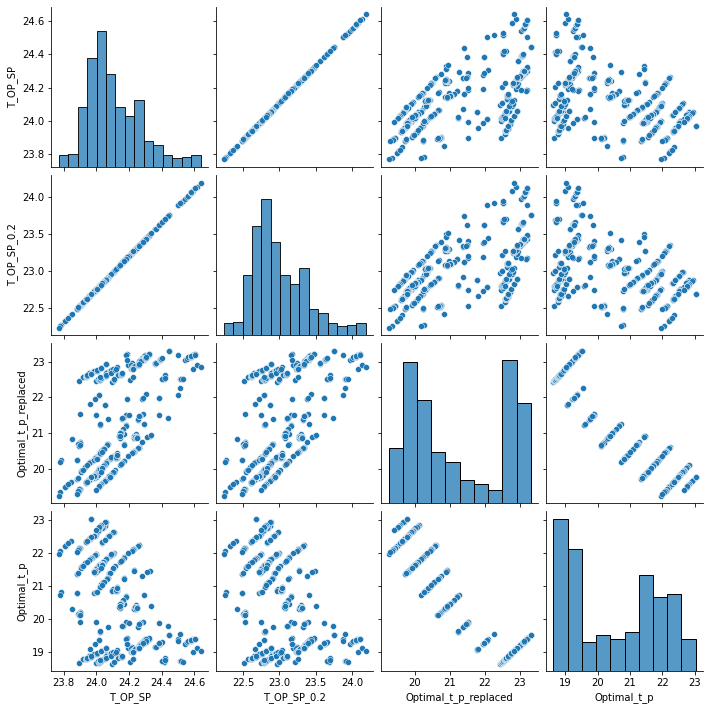

In [ ]:
import seaborn as sns
sns.pairplot(Dataa)

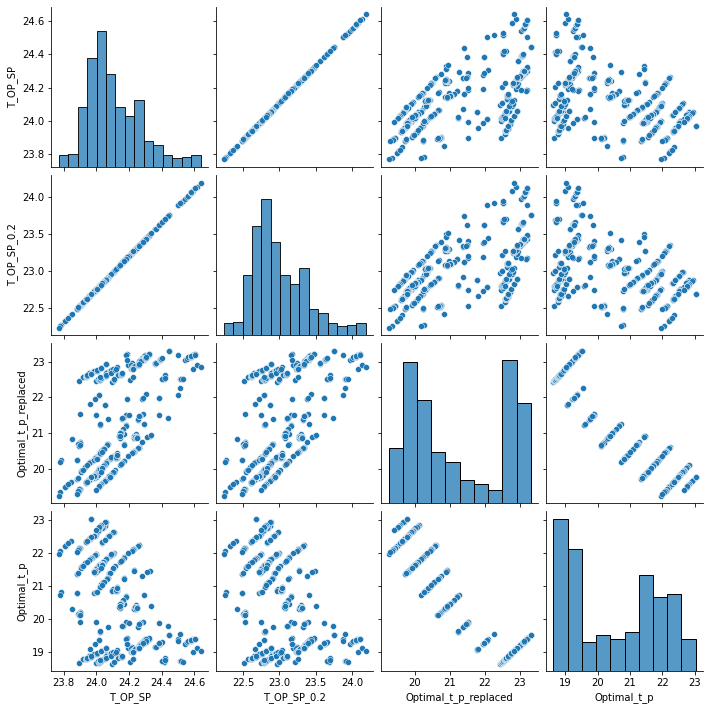

In [ ]:
sns.pairplot(Dataa, vars=Dataa.columns)
plt.show()